# 2019 nCov Tracking

## 1. Data Sources

### 1.1 Singapore

- **Ministry of Health**: https://www.moh.gov.sg/2019-ncov-wuhan

### 1.2 Worldwide

- **John Hopkins**: https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

### 1.3 Libraries & Dependencies

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import requests

## 2. Data

### 2.1 Singapore Data

In [2]:
%%writefile data/singapore.csv
Date,Cases,URL
23 Jan 2020,  1, https://www.moh.gov.sg/news-highlights/details/confirmed-imported-case-of-novel-coronavirus-infection-in-singapore-multi-ministry-taskforce-ramps-up-precautionary-measures
24 Jan 2020,  3, https://www.moh.gov.sg/news-highlights/details/two-more-cases-of-confirmed-imported-case-of-novel-coronavirus-infection-in-singapore
26 Jan 2020,  4, https://www.moh.gov.sg/news-highlights/details/fourth-confirmed-imported-case-of-wuhan-coronavirus-infection-in-singapore
27 Jan 2020,  5, https://www.moh.gov.sg/news-highlights/details/fifth-confirmed-imported-case-of-wuhan-coronavirus-infection-in-singapore-27Jan
28 Jan 2020,  7, https://www.channelnewsasia.com/news/singapore/wuhan-virus-singapore-latest-confirmed-cases-coronavirus-12360924
29 Jan 2020, 10, https://www.moh.gov.sg/news-highlights/details/three-more-confirmed-imported-cases-of-wuhan-coronavirus-infection-in-singapore
30 Jan 2020, 13, https://www.moh.gov.sg/news-highlights/details/three-more-confirmed-imported-cases-of-wuhan-coronavirus-infection-in-singapore-30Jan
31 Jan 2020, 16, https://www.moh.gov.sg/news-highlights/details/three-more-confirmed-imported-cases-of-wuhan-coronavirus-infection-in-singapore-31-jan
 1 Feb 2020, 18, https://www.moh.gov.sg/news-highlights/details/two-more-confirmed-imported-cases-of-novel-coronavirus-infection-in-singapore
 2 Feb 2020, 18, https://www.moh.gov.sg/news-highlights/details/no-new-confirmed-cases-of-novel-coronavirus-infection-in-singapore
 3 Feb 2020, 18, https://www.moh.gov.sg/news-highlights/details/no-new-confirmed-cases-of-novel-coronavirus-infection-in-singapore-3-Feb
 4 Feb 2020, 24, https://www.moh.gov.sg/news-highlights/details/confirmed-cases-of-local-transmission-of-novel-coronavirus-infection-in-singapore
 5 Feb 2020, 28, https://www.moh.gov.sg/news-highlights/details/four-more-confirmed-cases-of-novel-coronavirus-infection-in-singapore
 6 Feb 2020, 30, https://www.moh.gov.sg/news-highlights/details/two-more-confirmed-cases-of-novel-coronavirus-infection-in-singapore
 7 Feb 2020, 33, https://www.moh.gov.sg/news-highlights/details/three-more-confirmed-cases-of-novel-coronavirus-infection-in-singapore

Overwriting data/singapore.csv


In [3]:
url = 'https://www.moh.gov.sg/2019-ncov-wuhan'
dfs = pd.read_html(url)

### 2.2 Worldwide Data

In [4]:
%%writefile data/worldwide.csv
Date,Mainland China,Other Locations
20 Jan 2020,   278,   4
21 Jan 2020,   326,   6
22 Jan 2020,   547,   8
23 Jan 2020,   639,  14
24 Jan 2020,   916,  25
25 Jan 2020,  2000,  40
26 Jan 2020,  2700,  57
27 Jan 2020,  4400,  64
28 Jan 2020,  6000,  87
29 Jan 2020,  7700, 105
30 Jan 2020,  9700, 118
31 Jan 2020, 11200, 153
 1 Feb 2020, 14300, 173
 2 Feb 2020, 17200, 183
 3 Feb 2020, 19700, 188
 4 Feb 2020, 23700, 212
 5 Feb 2020, 27400, 227
 6 Feb 2020, 30600, 265
 7 Feb 2020, 34100, 317

Overwriting data/worldwide.csv


## 3. Data Preprocessing

In [5]:
dfsg = pd.read_csv('data/singapore.csv')
dfsg['Date'] = pd.to_datetime(dfsg['Date'], dayfirst=True)
dfsg.head()

,Date,Cases,URL
0,2020-01-23,1,https://www.moh.gov.sg/news-highlights/detail...
1,2020-01-24,3,https://www.moh.gov.sg/news-highlights/detail...
2,2020-01-26,4,https://www.moh.gov.sg/news-highlights/detail...
3,2020-01-27,5,https://www.moh.gov.sg/news-highlights/detail...
4,2020-01-28,7,https://www.channelnewsasia.com/news/singapor...


In [6]:
dfw = pd.read_csv('data/worldwide.csv')
dfw['Date'] = pd.to_datetime(dfw['Date'], dayfirst=True)
dfw['Total'] = dfw['Mainland China'] + dfw['Other Locations']

In [7]:
dfw

,Date,Mainland China,Other Locations,Total
0,2020-01-20,278,4,282
1,2020-01-21,326,6,332
2,2020-01-22,547,8,555
3,2020-01-23,639,14,653
4,2020-01-24,916,25,941
5,2020-01-25,2000,40,2040
6,2020-01-26,2700,57,2757
7,2020-01-27,4400,64,4464
8,2020-01-28,6000,87,6087
9,2020-01-29,7700,105,7805


## 4. Plots

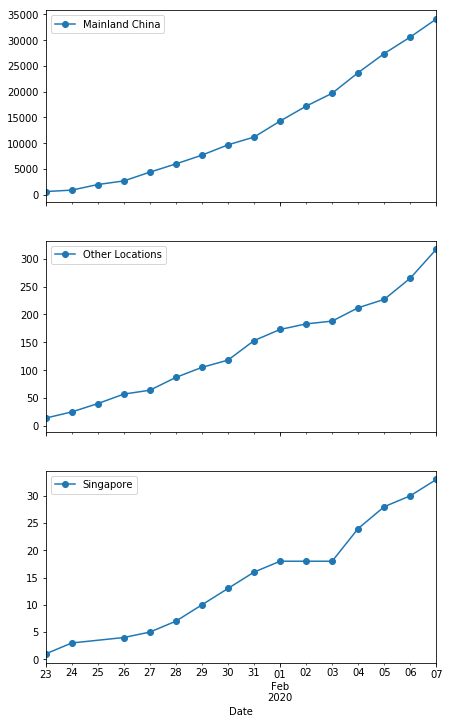

In [8]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(7,12))
dfw.plot(x='Date', y='Mainland China', marker='o', ax=ax[0]);
dfw.plot(x='Date', y='Other Locations', marker='o', ax=ax[1]);
dfsg.plot(x='Date', y='Cases', marker='o', ax=ax[2], label='Singapore');